In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    make_scorer,
    mean_absolute_percentage_error
)

#Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [120]:
# Load dataset
df = pd.read_csv("players_data.csv")
print(df.head())

   userNum nickname    gameId  seasonId  gameRank character            weapon  \
0  5426009       마샤  46678118        31         2     Cathy            Dagger   
1  5296453   쿠로미여동생  46678118        31         1     Hisui  Two-handed_Sword   
2  5162955   우주생명마음  46678118        31         5     Adina            Arcana   
3  5140049  只玩过卡拉彼丘  46678118        31         7    Ly Anh            Dagger   
4  5051669  초고교급마다키  46678118        31         7   Tsubame          Shuriken   

         itemWeapon     itemChest        itemHead  ...            Trait_Main1  \
0             Asura  The_Revenant  Imperial_Crown  ...   Unwavering_Mentality   
1  Aurora_Longsword        Áo_Dài  Blaster_Helmet  ...  Contempt_for_the_Weak   
2          The_Moon   Blood_Cloak         Persona  ...            Open_Wounds   
3          Maharaja  Dragon_Dobok      Cowboy_Hat  ...                 Frenzy   
4     Petal_Torrent      Changpao   Crystal_Tiara  ...      Dismantle_Goliath   

    Trait_Main2           

In [148]:
# Sort players within each game and rank
df = df.sort_values(by=['gameId', 'gameRank'])

In [149]:
print(df.head)

<bound method NDFrame.head of         userNum   nickname    gameId  seasonId  gameRank  character  \
602     5254112   StarFall  46678029         0         1      Adina   
611     2505398        御雪熙  46678029         0         1     Lenore   
617     1014680       0big  46678029         0         1  Li Dailin   
609     3250902       みゅーき  46678029         0         2     Alonso   
615     1071090  천연기념물329호  46678029         0         2      Adela   
...         ...        ...       ...       ...       ...        ...   
261178  4565951       기믹퍼핏  48019201        31         7     Ly Anh   
261194   542330       C2va  48019201        31         7     Jackie   
261177  4660602   BaiGhost  48019201        31         8    Bernice   
261175  4959577       물꼬북2  48019201        31         8     Magnus   
261188  1239576        김토와  48019201        31         8      Hisui   

                  weapon            itemWeapon                itemChest  \
602               Arcana              The_

In [ ]:
# Assign index within each game+rank group
df['teamIndex'] = df.groupby(['gameId', 'gameRank']).cumcount()

In [151]:
print(df.head)

<bound method NDFrame.head of         userNum   nickname    gameId  seasonId  gameRank  character  \
602     5254112   StarFall  46678029         0         1      Adina   
611     2505398        御雪熙  46678029         0         1     Lenore   
617     1014680       0big  46678029         0         1  Li Dailin   
609     3250902       みゅーき  46678029         0         2     Alonso   
615     1071090  천연기념물329호  46678029         0         2      Adela   
...         ...        ...       ...       ...       ...        ...   
261178  4565951       기믹퍼핏  48019201        31         7     Ly Anh   
261194   542330       C2va  48019201        31         7     Jackie   
261177  4660602   BaiGhost  48019201        31         8    Bernice   
261175  4959577       물꼬북2  48019201        31         8     Magnus   
261188  1239576        김토와  48019201        31         8      Hisui   

                  weapon            itemWeapon                itemChest  \
602               Arcana              The_

In [152]:
# Keep only full teams (i.e., groups where count is a multiple of 3)
full_teams = df.groupby(['gameId', 'gameRank']).filter(lambda x: len(x) % 3 == 0)

In [147]:
print(df.head)

<bound method NDFrame.head of         userNum   nickname    gameId  seasonId  gameRank  character  \
602     5254112   StarFall  46678029         0         1      Adina   
611     2505398        御雪熙  46678029         0         1     Lenore   
617     1014680       0big  46678029         0         1  Li Dailin   
609     3250902       みゅーき  46678029         0         2     Alonso   
615     1071090  천연기념물329호  46678029         0         2      Adela   
...         ...        ...       ...       ...       ...        ...   
261178  4565951       기믹퍼핏  48019201        31         7     Ly Anh   
261194   542330       C2va  48019201        31         7     Jackie   
261177  4660602   BaiGhost  48019201        31         8    Bernice   
261175  4959577       물꼬북2  48019201        31         8     Magnus   
261188  1239576        김토와  48019201        31         8      Hisui   

                  weapon            itemWeapon                itemChest  \
602               Arcana              The_

In [153]:
# Assign team ID within each game+rank
full_teams['teamId'] = full_teams.groupby(['gameId', 'gameRank']).cumcount() // 3
full_teams['Team_ID'] = (
    full_teams['gameId'].astype(str) + '_' +
    full_teams['gameRank'].astype(str) + '_' +
    full_teams['teamId'].astype(str)
)

In [ ]:
print(df.head)

In [ ]:
print("Data after assigning team IDs:")
print(full_teams[['gameId', 'teamId', 'Team_ID']].head(10))

Data after assigning team IDs:
       gameId  teamId     Team_ID
601  46678029       0  46678029_0
624  46678029       0  46678029_0
602  46678029       0  46678029_0
603  46678029       1  46678029_1
604  46678029       1  46678029_1
605  46678029       1  46678029_1
606  46678029       2  46678029_2
608  46678029       2  46678029_2
609  46678029       2  46678029_2
610  46678029       3  46678029_3


In [159]:
# Calculate team placement 
teams = full_teams.groupby('Team_ID').agg({
    'gameId': 'first',
    'Kill': 'sum',
    'Assist': 'sum',
    'Death': 'sum',
    'Dmg_Player': 'sum',
    'Dmg_Monster': 'sum',
    'gameRank': 'first',  # since they're identical within a team
    'character': lambda x: list(x)
}).reset_index().rename(columns={'gameRank': 'teamPlacement'})


In [160]:
# Keep only proper trios
teams = teams[teams['character'].apply(len) == 3]

In [ ]:
# Separate characters into teams
temp_chars = pd.DataFrame(teams['character'].tolist(), columns=['char1', 'char2', 'char3'])
teams = pd.concat([teams.drop(columns='character'), temp_chars], axis=1)

print("Team stats with separated characters:")
print(teams.head())

Team stats with separated characters:
        Team_ID    gameId  Kill  Assist  Death  Dmg_Player  Dmg_Monster  \
0  46678029_1_0  46678029    13      21     11       62112       208177   
1  46678029_2_0  46678029     7      10     12       38223       153835   
2  46678029_3_0  46678029    11      13     10       46516       173631   
3  46678029_4_0  46678029     9      15      5       38821       181832   
4  46678029_5_0  46678029     8      12     10       57173        90100   

   teamPlacement   char1    char2      char3  
0              1   Adina   Lenore  Li Dailin  
1              2  Alonso    Adela      Yumin  
2              3   Katja     Yuki      Cathy  
3              4  Celine   Alonso       Hart  
4              5    Emma  Estelle      Katja  


In [162]:
print("Missing values:")
print(temp_chars.isnull().sum())


Missing values:
char1    0
char2    0
char3    0
dtype: int64


In [164]:
print(f"Total complete 3-player teams: {teams.shape[0]}")
print(f"Total players in complete teams: {teams.shape[0] * 3}")


Total complete 3-player teams: 89488
Total players in complete teams: 268464


In [166]:
original_players = df.shape[0]
cleaned_players = full_teams.shape[0]
retained_percent = (cleaned_players / original_players) * 100

print(f"Original players: {original_players}")
print(f"Players in complete teams: {cleaned_players}")
print(f"Retained: {retained_percent:.2f}% of the data")


Original players: 311265
Players in complete teams: 268464
Retained: 86.25% of the data


In [167]:
# Features and target
X = teams.drop(columns=['Team_ID', 'teamPlacement'])
y = teams['teamPlacement']


In [168]:
# Categorical and numerical features
Categorical = ['char1', 'char2', 'char3']
Numeric = ['Kill', 'Assist', 'Death', 'Dmg_Player', 'Dmg_Monster']

In [169]:
# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, Numeric),
    ('cat', categorical_transformer, Categorical)
])

In [170]:
# Full pipeline with regression model
TeamWin_Pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))
])

In [171]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing df split:")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training and testing df split:
Training samples: 71590, Testing samples: 17898


In [ ]:
#lighter multi model tester
# Sample and prepare dataset
SAMPLE_SIZE = 8000
train_df = X_train.copy()
train_df['label'] = y_train  # no need to encode for regression

sampled_df = train_df.sample(n=SAMPLE_SIZE, random_state=42)
X_sampled = sampled_df.drop(columns='label')
y_sampled = sampled_df['label'].values

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_jobs=-1, random_state=42),
    "XGBoost": XGBRegressor(n_jobs=-1, random_state=42),
    "LightGBM": LGBMRegressor(n_jobs=-1, random_state=42)
}

# Define scoring metrics
regression_metrics = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Hyperparameter tuning if needed
    if name == "Random Forest":
        param_dist = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        model = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)

    if name == "Gradient Boosting":
        param_dist = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        model = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    scores = cross_validate(
        pipeline,
        X_sampled,
        y_sampled,
        cv=3,
        scoring=list(regression_metrics.values()),
        return_train_score=False,
        n_jobs=-1,
        verbose=10
    )

    # Store results
    results[name] = {
        'r2': (scores['test_r2'].mean(), scores['test_r2'].std()),
        'rmse': (-scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()),
        'mae': (-scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std()),
        'mape': (-scores['test_neg_mean_absolute_percentage_error'].mean(), scores['test_neg_mean_absolute_percentage_error'].std())
    }

# Format as DataFrame
results_df = pd.DataFrame(results).T

# Expand columns
for metric in regression_metrics.keys():
    results_df[[f'{metric}_mean', f'{metric}_std']] = pd.DataFrame(results_df[metric].tolist(), index=results_df.index)

results_df = results_df.drop(columns=regression_metrics.keys())
results_df = results_df.sort_values(by='r2_mean', ascending=False)

# Show results
print(results_df)


Evaluating Linear Regression...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1281125545501709s.) Setting batch_size=2.


Evaluating Ridge...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1477668285369873s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating Lasso...
Evaluating ElasticNet...


[Parallel(n_jobs=-1)]: Batch computation too fast (0.16575145721435547s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating Decision Tree...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating Random Forest...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating Gradient Boosting...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating HistGradientBoosting...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating AdaBoost...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating Extra Trees...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating XGBoost...


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Evaluating LightGBM...
                       r2_mean    r2_std  rmse_mean  rmse_std  mae_mean  \
Random Forest         0.784545  0.010655   1.074600  0.019080  0.781812   
HistGradientBoosting  0.781326  0.009913   1.082666  0.017156  0.800154   
LightGBM              0.779544  0.008673   1.087150  0.013530  0.803805   
Gradient Boosting     0.776629  0.014102   1.093894  0.026223  0.810334   
Extra Trees           0.773193  0.012439   1.102440  0.022000  0.796234   
XGBoost               0.767665  0.011818   1.115884  0.020949  0.826068   
Ridge                 0.707240  0.009699   1.252914  0.012770  0.987211   
Linear Regression     0.702927  0.014034   1.261874  0.021357  0.996283   
AdaBoost              0.692594  0.025508   1.282773  0.044795  1.060307   
ElasticNet            0.666011  0.010923   1.338251  0.014690  1.072210   
Lasso                 0.651463  0.012680   1.367017  0.016205  1.095276   
Decision Tree         0.599571  0.018132   1.465095  0.024916  0.983625   

 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


Evaluating Linear Regression (for box)...
Evaluating Ridge (for box)...
Evaluating Lasso (for box)...
Evaluating ElasticNet (for box)...
Evaluating Decision Tree (for box)...
Evaluating Random Forest (for box)...
Evaluating Gradient Boosting (for box)...
Evaluating HistGradientBoosting (for box)...
Evaluating AdaBoost (for box)...
Evaluating Extra Trees (for box)...
Evaluating XGBoost (for box)...
Evaluating LightGBM (for box)...


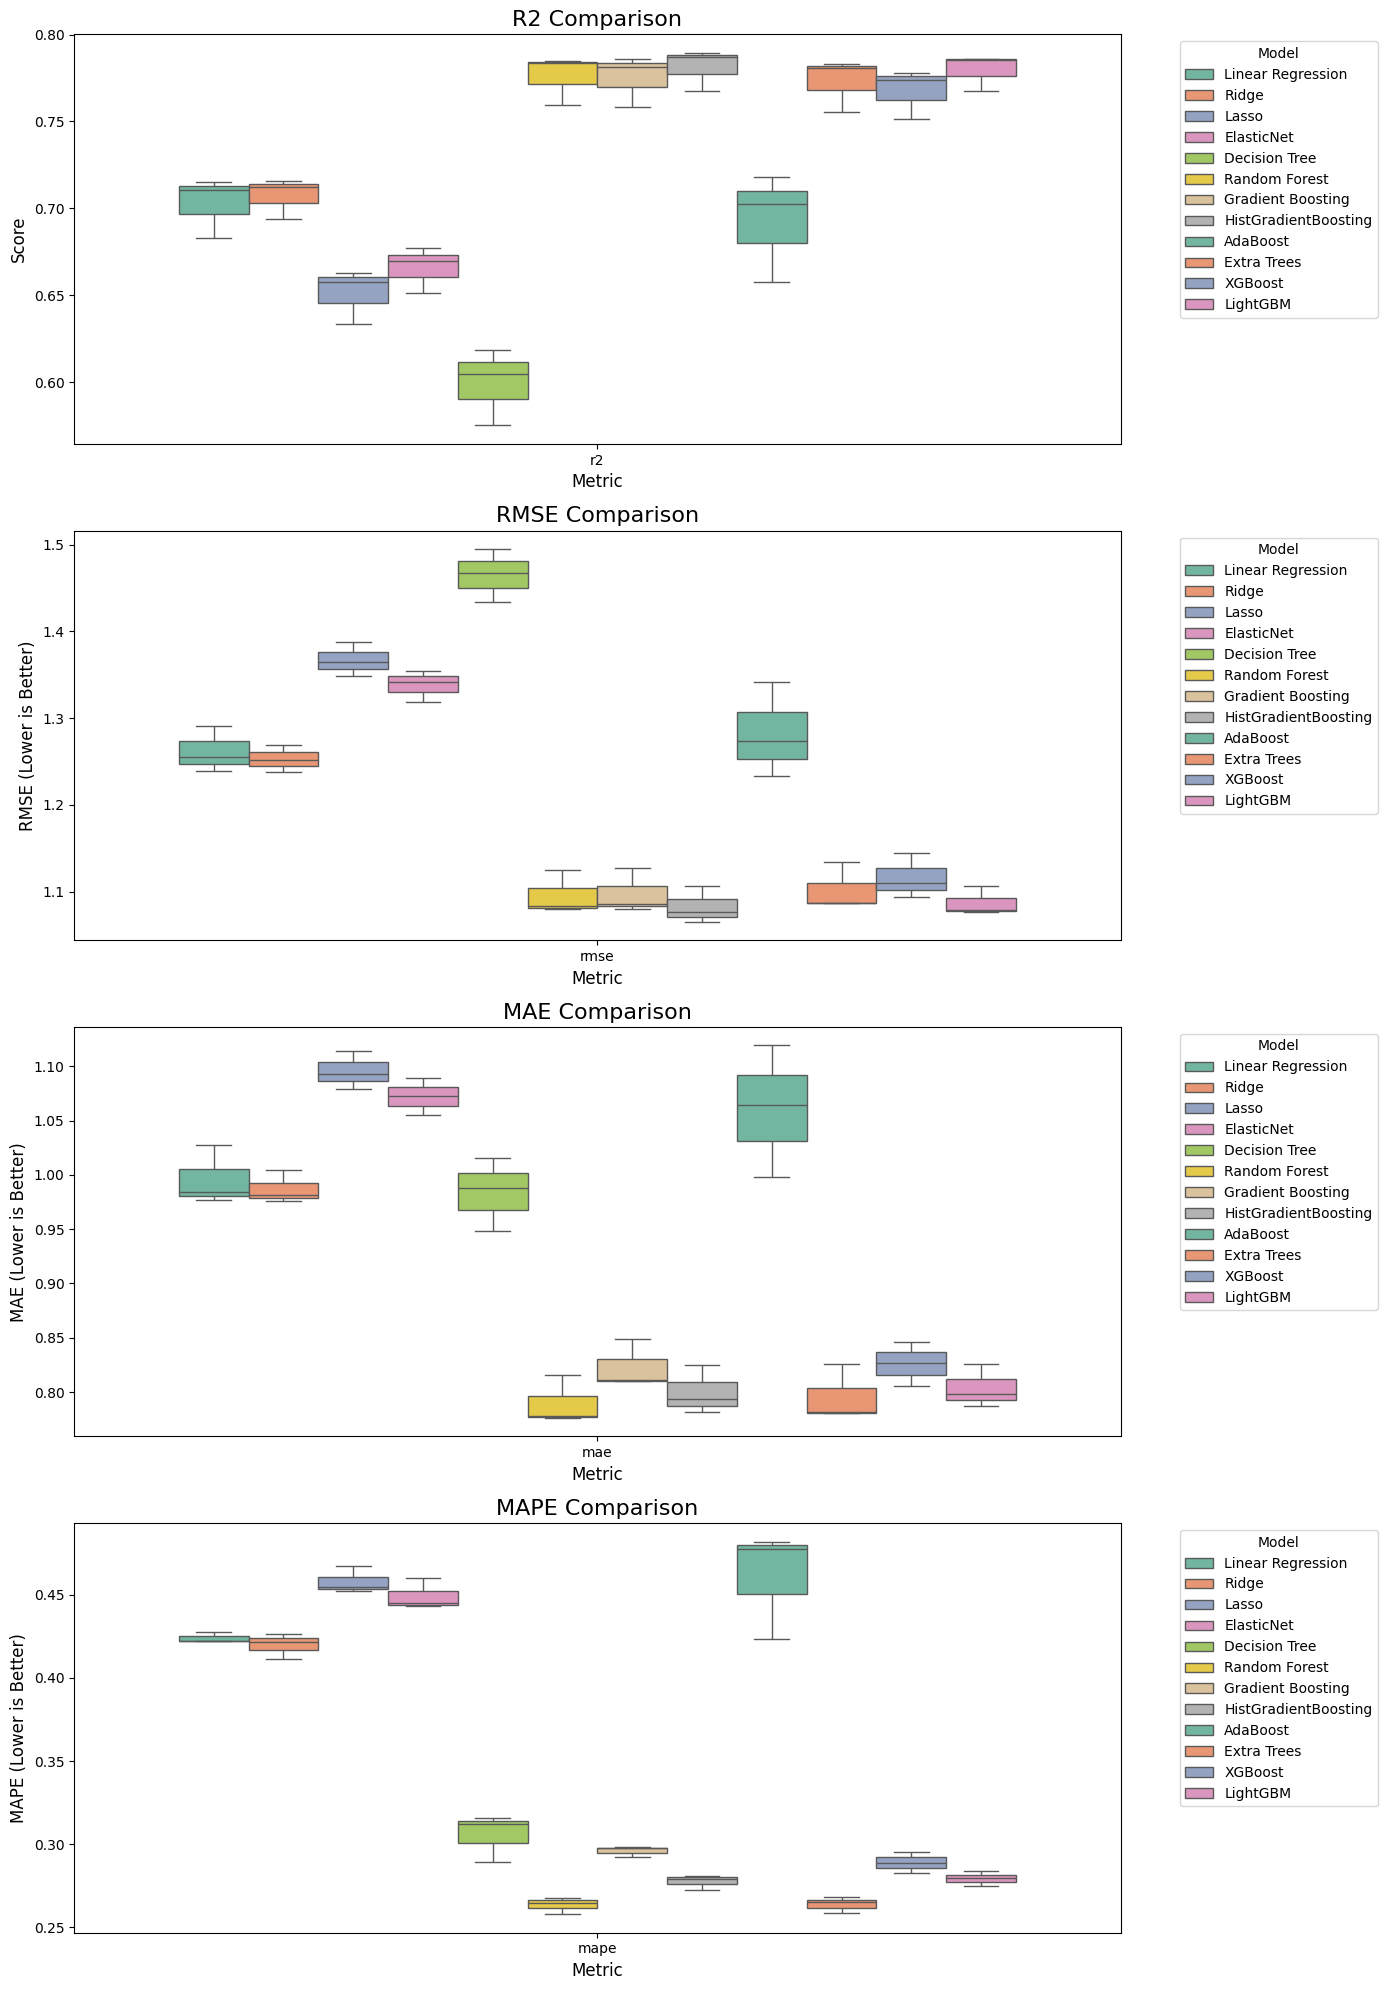

In [17]:
cv_results = {
    'model': [],
    'metric': [],
    'score': []
}

# Metric labels
metric_labels = {
    'r2': 'r2',
    'neg_root_mean_squared_error': 'rmse',
    'neg_mean_absolute_error': 'mae',
    'neg_mean_absolute_percentage_error': 'mape'
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name} (for box)...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    scores = cross_validate(
        pipeline,
        X_sampled,
        y_sampled,
        cv=3,
        scoring=list(metric_labels.keys()),
        return_train_score=False,
        n_jobs=-1
    )

    for metric, label in metric_labels.items():
        for score in scores[f'test_{metric}']:
            score_val = -score if metric.startswith('neg_') else score
            cv_results['model'].append(name)
            cv_results['metric'].append(label)
            cv_results['score'].append(score_val)

#convert to DataFrame and plot
cv_results_df = pd.DataFrame(cv_results)

# Plot
plt.figure(figsize=(14, 5 * len(metric_labels)))

for i, metric in enumerate(metric_labels.values(), 1):
    plt.subplot(len(metric_labels), 1, i)
    sns.boxplot(
        x='metric',
        y='score',
        hue='model',
        data=cv_results_df[cv_results_df['metric'] == metric],
        palette='Set2'
    )
    plt.title(f'{metric.upper()} Comparison', fontsize=16)
    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    if metric != 'r2':
        plt.ylabel(f'{metric.upper()} (Lower is Better)')

plt.tight_layout()
plt.show()


In [172]:
# Train model
TeamWin_Pipeline.fit(X_train, y_train)  

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kill', 'Assist', 'Death',
                                                   'Dmg_Player',
                                                   'Dmg_Monster']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['char1', 'char2',
                                                   'char3'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

245 245
               Feature  Importance
4     num__Dmg_Monster    0.604128
0            num__Kill    0.084484
3      num__Dmg_Player    0.072226
1          num__Assist    0.051892
2           num__Death    0.039807
..                 ...         ...
102   cat__char2_Chloe    0.000226
209   cat__char3_Karla    0.000198
207  cat__char3_Johann    0.000136
47   cat__char1_Johann    0.000123
127  cat__char2_Johann    0.000117

[245 rows x 2 columns]


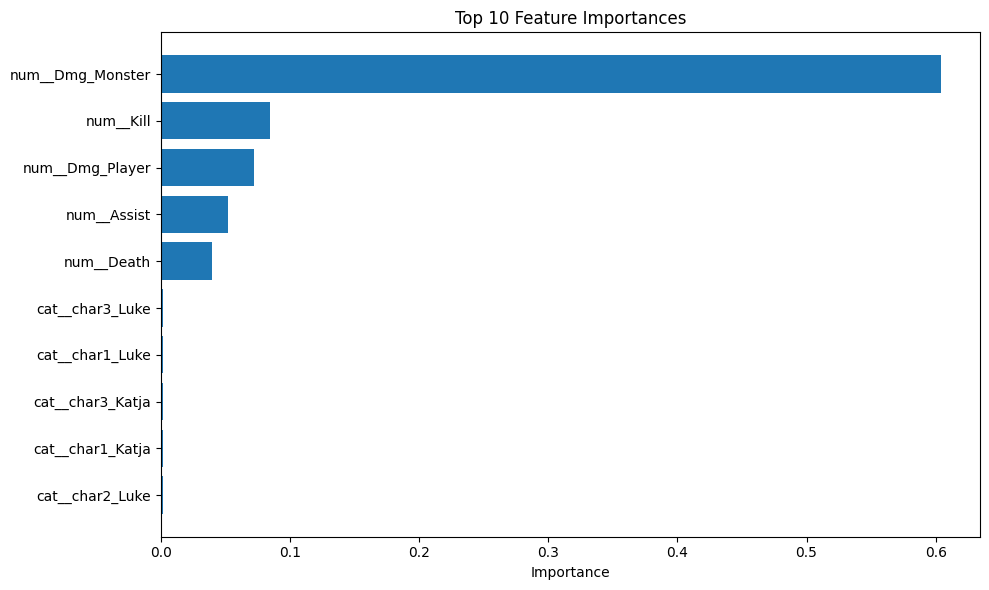

In [173]:
# Get feature importances from the trained model
importances = TeamWin_Pipeline.named_steps['regressor'].feature_importances_

# After preprocessing, get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Check the number of features in feature_names and importances
print(len(feature_names), len(importances))
importances = importances[:len(feature_names)]


# Pair the importances with feature names for easier interpretation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

# Get the top 10 most important features
top_n = 10
top_features = feature_importance_df.head(top_n)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()


In [174]:
# Predict
y_pred = TeamWin_Pipeline.predict(X_test)

In [175]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

RMSE: 1.12
R^2 Score: 0.75


In [ ]:
def TestCode_Predict(char1, char2, char3):
    selected_chars = [char1, char2, char3]

    # Check if exact team exists
    existing_team_data = df[df['character'].isin(selected_chars)]
    team_match = existing_team_data.groupby('gameId').filter(lambda x: len(x['character'].unique()) == 3)


    if not team_match.empty:
        print(f"Exact Team Match Found for {char1}, {char2}, {char3}")

        # Count how many games this exact team has appeared in
        team_games = team_match.groupby('gameId').filter(lambda x: len(set(x['character'])) == 3)
        num_games = team_games['gameId'].nunique()

        # Get average team placements
        team_placements = team_games.groupby('gameId')['gameRank'].mean()

        # Breakdown of top finishes
        num_top1 = (team_placements == 1).sum()
        num_top2_3 = ((team_placements > 1) & (team_placements <= 3)).sum()
        num_top3_total = num_top1 + num_top2_3
        win_rate = (num_top3_total / num_games) * 100 if num_games > 0 else 0
        historical_placement = team_placements.mean()

        print(f"Games Played Together       : {num_games}")
        print(f"1st Place Finishes         : {num_top1}")
        print(f"2nd–3rd Place Finishes     : {num_top2_3}")
        print(f"Total Top 3 Finishes       : {num_top3_total}")
        print(f"Win Rate (Top 3)           : {win_rate:.2f}%")
        print(f"Average Placement          : {historical_placement:.2f}")

        # Character synergy: sum their individual average stats
        char_stats = df[df['character'].isin(selected_chars)]
        char_means = (
            char_stats.groupby('character')[['Kill', 'Assist', 'Death', 'Dmg_Player', 'Dmg_Monster']]
            .mean()
            .reindex(selected_chars)
            .fillna(0)
        )
        team_stats = char_means.sum().to_dict()

        input_row = pd.DataFrame([{
            **team_stats,
            'char1': char1,
            'char2': char2,
            'char3': char3,
            'historical_placement': historical_placement
        }])

        print("\nCombined Stats for the Team:")
        print(f"   Total Kills        : {team_stats['Kill']:.2f}")
        print(f"   Total Assists      : {team_stats['Assist']:.2f}")
        print(f"   Total Deaths       : {team_stats['Death']:.2f}")
        print(f"   Total Dmg (Player) : {team_stats['Dmg_Player']:.2f}")
        print(f"   Total Dmg (Monster): {team_stats['Dmg_Monster']:.2f}")

        predicted = TeamWin_Pipeline.predict(input_row)[0]
        print(f"Predicted Placement (From Model): {predicted:.2f}")

        return predicted

    else:
        print(f"No Exact Match Found for {char1}, {char2}, {char3}. Using Average Stats and Synergy...")

        char_stats = df[df['character'].isin(selected_chars)]
        char_means = (
            char_stats.groupby('character')[['Kill', 'Assist', 'Death', 'Dmg_Player', 'Dmg_Monster']]
            .mean()
            .reindex(selected_chars)
            .fillna(0)
        )
        team_stats = char_means.sum().to_dict()

        input_row = pd.DataFrame([{
            **team_stats,
            'char1': char1,
            'char2': char2,
            'char3': char3
        }])

        print("\nCombined Stats for the Team:")
        print(f"   Total Kills        : {team_stats['Kill']:.2f}")
        print(f"   Total Assists      : {team_stats['Assist']:.2f}")
        print(f"   Total Deaths       : {team_stats['Death']:.2f}")
        print(f"   Total Dmg (Player) : {team_stats['Dmg_Player']:.2f}")
        print(f"   Total Dmg (Monster): {team_stats['Dmg_Monster']:.2f}")

        predicted = TeamWin_Pipeline.predict(input_row)[0]
        print(f"Predicted Placement (From Model): {predicted:.2f}")

        return predicted


In [180]:
#Test:
TestCode_Predict('Li Dailin', 'Adina', 'Lenore')


Exact Team Match Found for Li Dailin, Adina, Lenore
Games Played Together       : 82
1st Place Finishes         : 1
2nd–3rd Place Finishes     : 17
Total Top 3 Finishes       : 18
Win Rate (Top 3)           : 21.95%
Average Placement          : 4.24

Combined Stats for the Team:
   Total Kills        : 9.17
   Total Assists      : 14.90
   Total Deaths       : 8.17
   Total Dmg (Player) : 45214.74
   Total Dmg (Monster): 142537.22
Predicted Placement (From Model): 3.91


3.91